In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import time
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import missingno as msno
from functools import partial
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv("/content/Bank Customer Churn Prediction.csv")

In [ ]:
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.shape

(10000, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
data.columns.values

array(['customer_id', 'credit_score', 'country', 'gender', 'age',
       'tenure', 'balance', 'products_number', 'credit_card',
       'active_member', 'estimated_salary', 'churn'], dtype=object)

In [ ]:
data.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [ ]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

<Axes: >

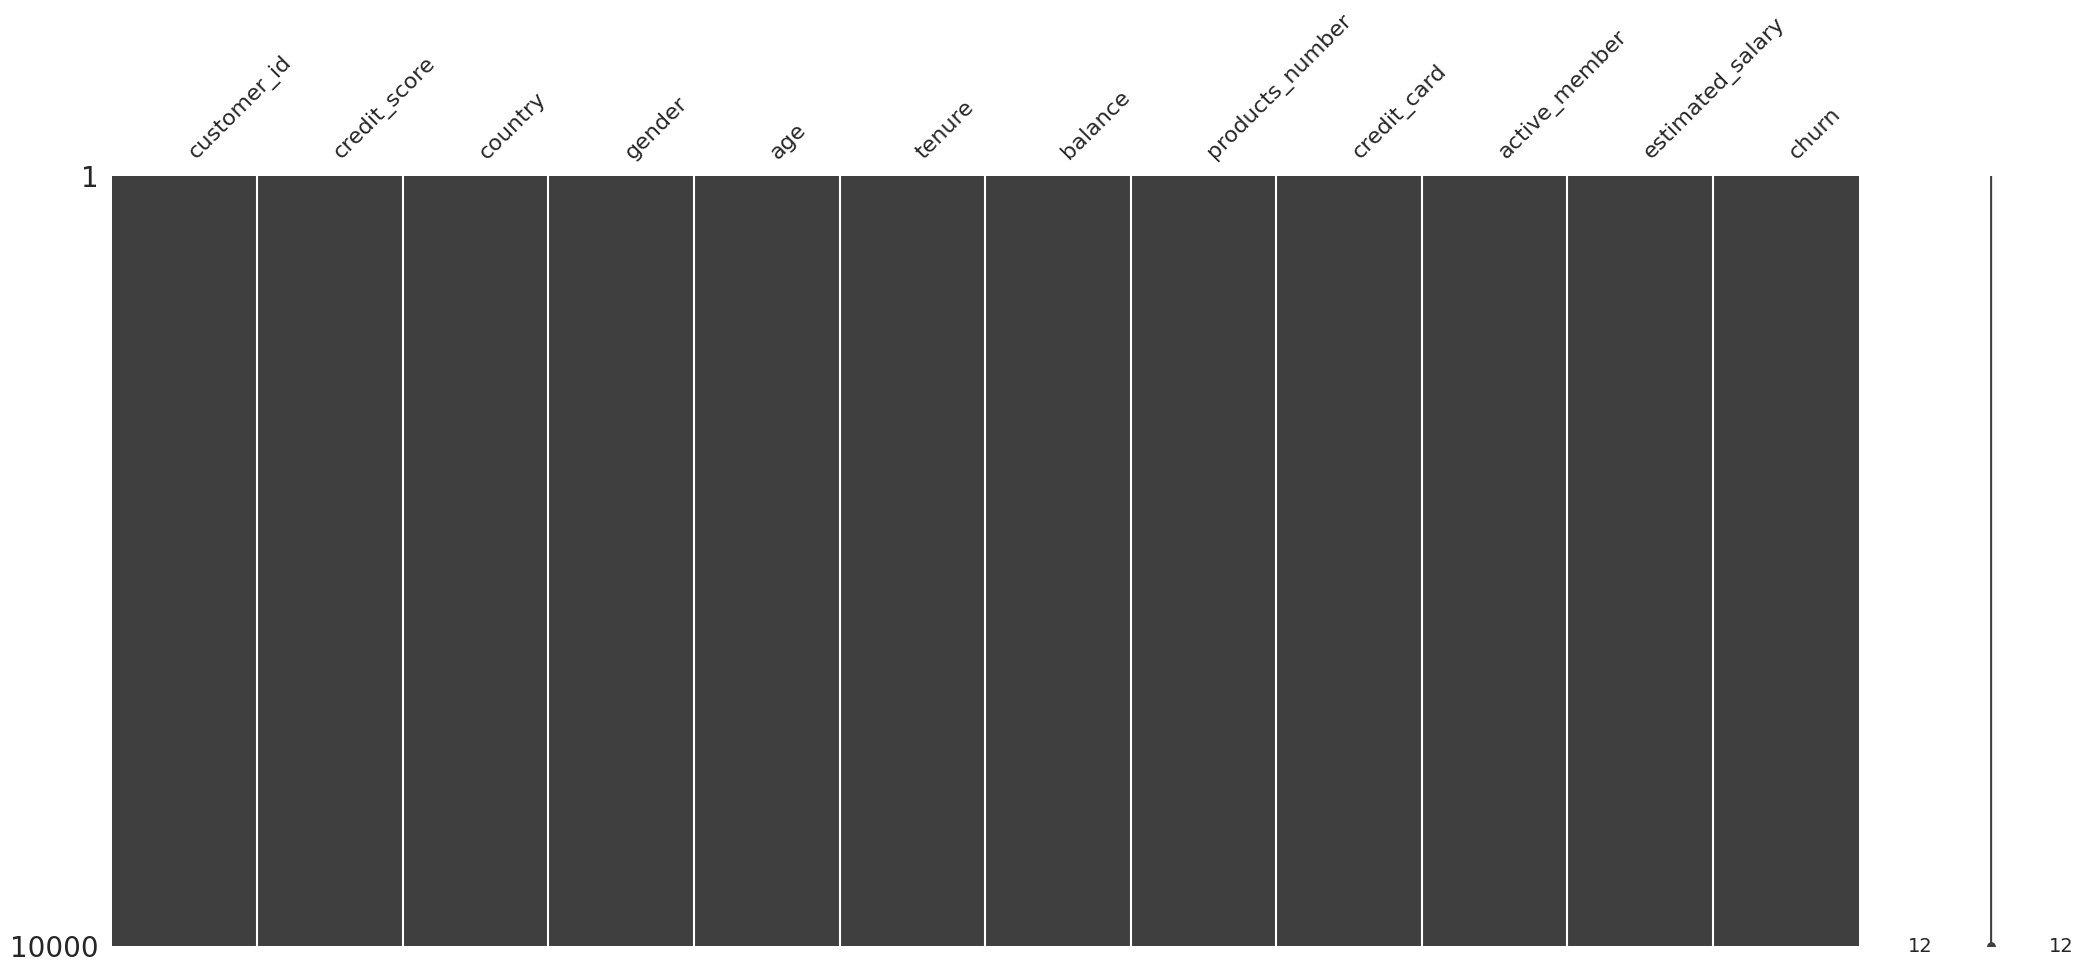

In [ ]:
msno.matrix(data)

From the above visualisation we can observe that it has no peculiar pattern that stands out. In fact there is no missing data.

In [ ]:
data = data.drop(['customer_id'], axis = 1)
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data['estimated_salary'] = pd.to_numeric(data.estimated_salary, errors='coerce')
data.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

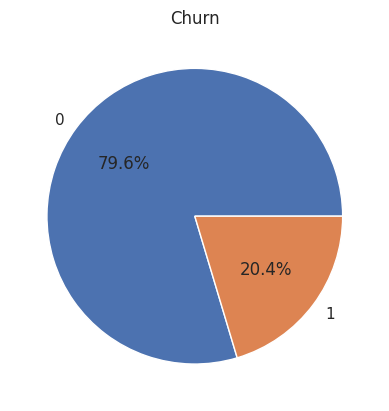

In [ ]:
churn_counts = data['churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%')
plt.title("Churn")
plt.show()

The customer churn rate is very low, accounting for about 20% of the total number of customers

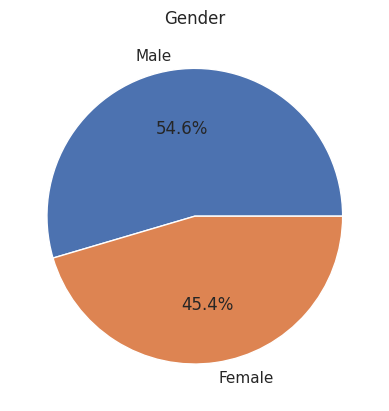

In [ ]:
gender_counts = data['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Gender")
plt.show()

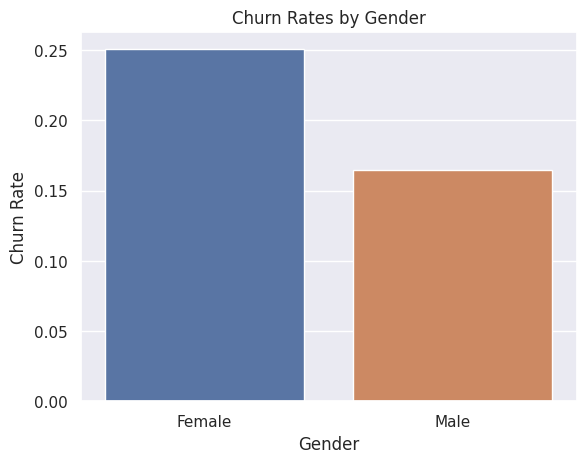

In [ ]:
gender_churn_rate = data.groupby('gender')['churn'].mean()
sns.barplot(x=gender_churn_rate.index, y=gender_churn_rate.values)
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('Churn Rates by Gender')
plt.show()

More than half of customers are male, but the churn rate of female customers is higher than that of male customers

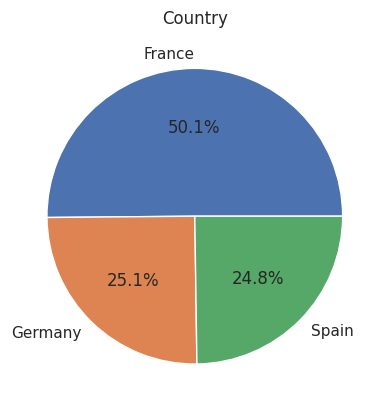

In [ ]:
country_counts = data['country'].value_counts()
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')
plt.title("Country")
plt.show()

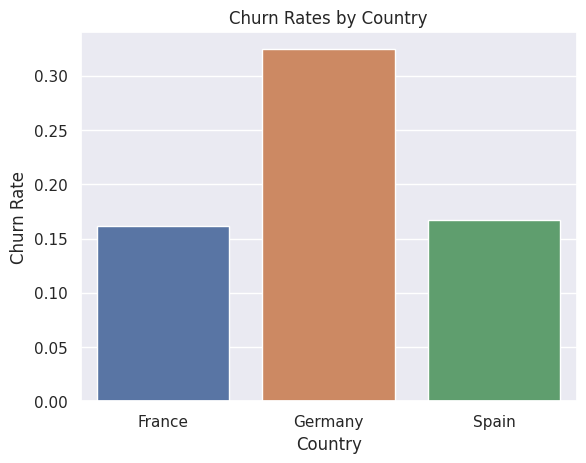

In [ ]:
country_churn_rate = data.groupby('country')['churn'].mean()
sns.barplot(x=country_churn_rate.index, y=country_churn_rate.values)
plt.xlabel('Country')
plt.ylabel('Churn Rate')
plt.title('Churn Rates by Country')
plt.show()

The registration rate is highest in France (accounting for 50%) and the registration rate is in Germany (25.1%) and Spain (accounting for 24.8%), however the customer churn rate in Germany and Spain is higher than in France. Especially Germany has a customer churn rate twice as high as France and Spain

Text(0.5, 1.0, 'Distribution of Ages Among Customers')

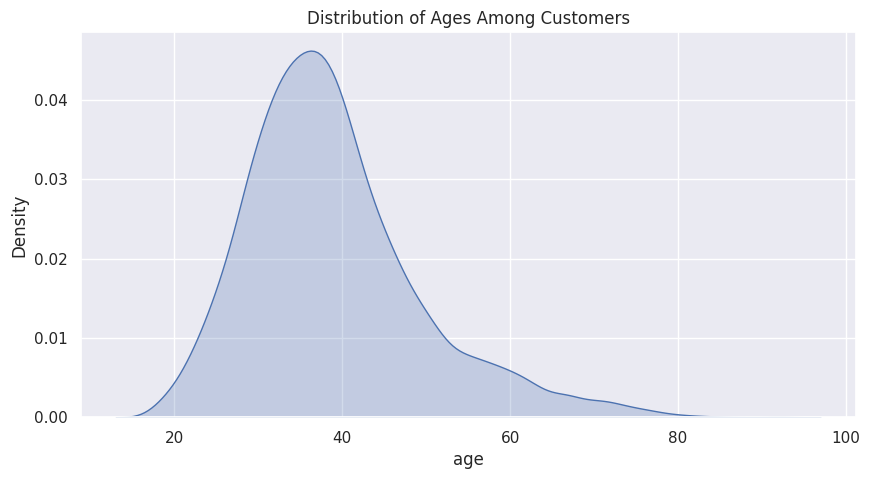

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data = data , x = data.age , fill = True, common_norm=False )
plt.title('Distribution of Ages Among Customers')

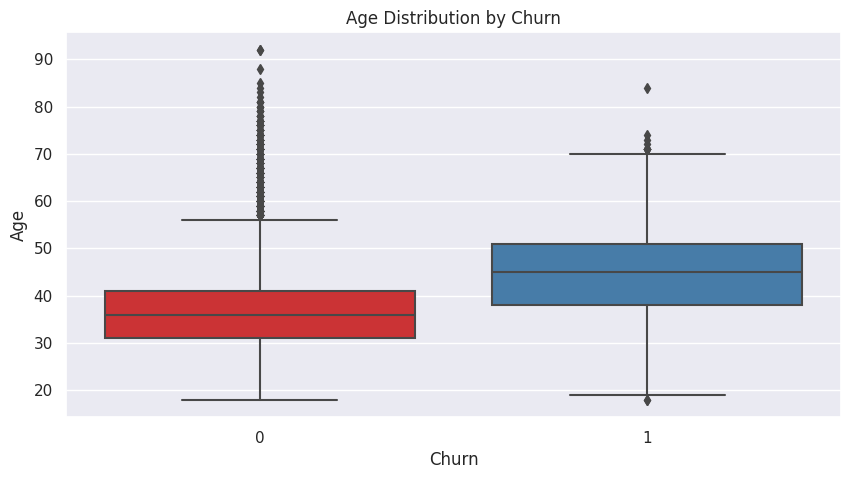

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='churn', y='age', data=data, palette='Set1')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.title('Age Distribution by Churn')
plt.show()

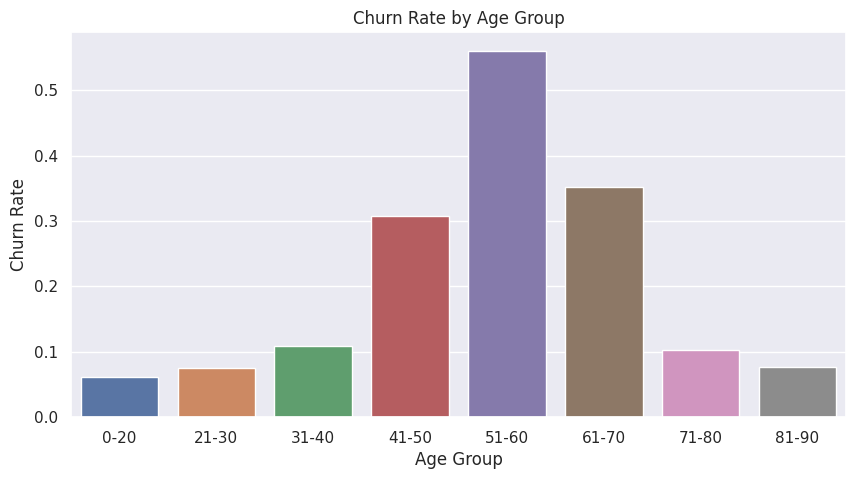

In [ ]:
age_bins = [0, 20, 30, 40, 50, 60, 70,80,90]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70','71-80','81-90']
data['AgeGroup'] = pd.cut(data['age'], bins= age_bins, labels= age_labels, right=False)
age_churn_rate = data.groupby('AgeGroup')['churn'].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=age_churn_rate.index, y=age_churn_rate.values)
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Age Group')
plt.show()

Customer age is unevenly distributed, focusing mainly on people over the age of 20, the majority of customers aged 51 - 60 have a high churn rate (over 50%), customers in the remaining age groups have left at a rate of about 10%, especially groups of customers between the ages of 41-50 and 61-70 have a churn rate of about 35%.

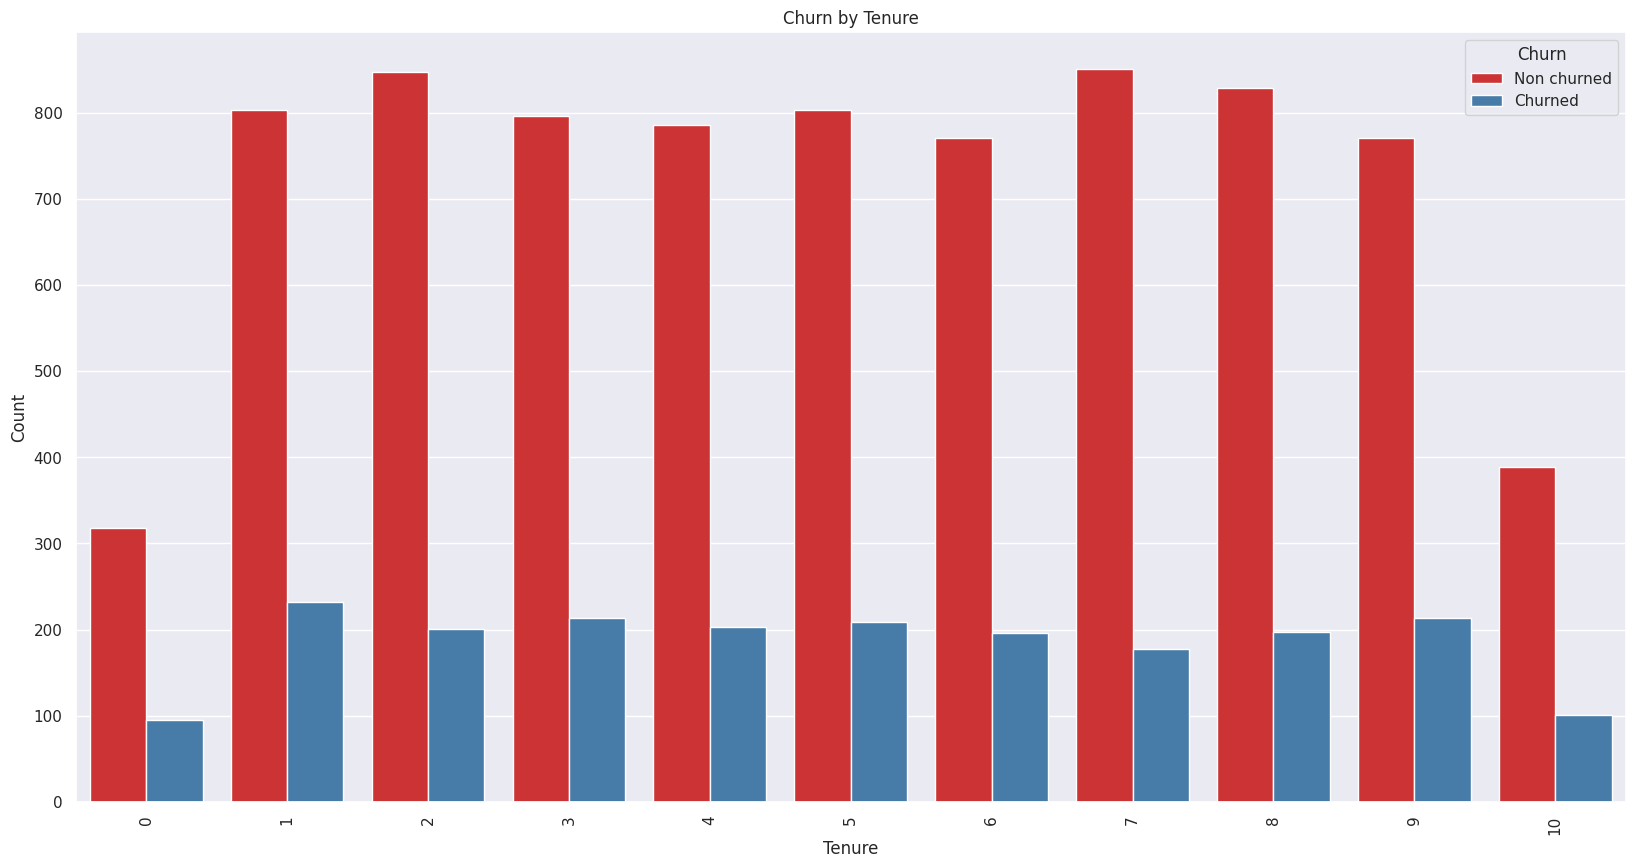

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='tenure', hue='churn', data=data, palette='Set1')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Non churned', 'Churned'])
plt.title('Churn by Tenure')
plt.xticks(rotation=90)
plt.show()

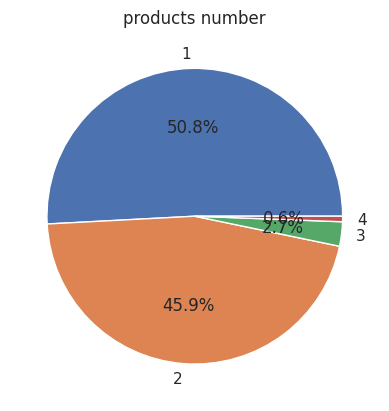

In [ ]:
products_number_counts = data['products_number'].value_counts()
plt.pie(products_number_counts, labels=products_number_counts.index, autopct='%1.1f%%')
plt.title("products number")
plt.show()

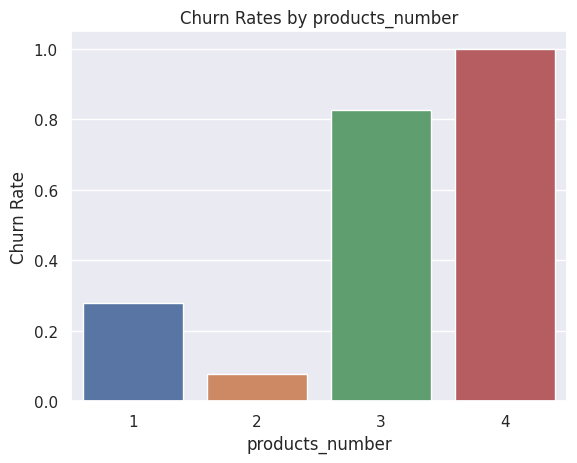

In [ ]:
products_number_churn_rate = data.groupby('products_number')['churn'].mean()
sns.barplot(x=products_number_churn_rate.index, y=products_number_churn_rate.values)
plt.xlabel('products_number')
plt.ylabel('Churn Rate')
plt.title('Churn Rates by products_number')
plt.show()

Customers using 1 service account for more than 50% and using 2 services is 45.9% and the remaining customers use 3.4 services. In general, customers who use 1 to 3 services have a fairly low churn rate, but customers who use 3 or 4 services leave a lot (3 services >80%, 4 services 100%).

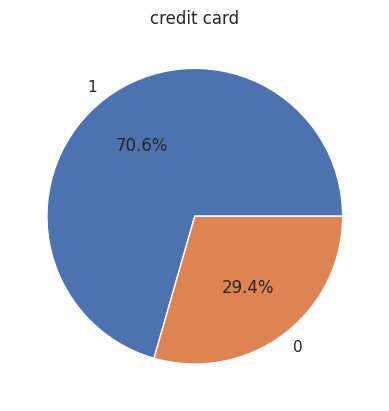

In [ ]:
credit_card_counts = data['credit_card'].value_counts()
plt.pie(credit_card_counts, labels=credit_card_counts.index, autopct='%1.1f%%')
plt.title("credit card")
plt.show()

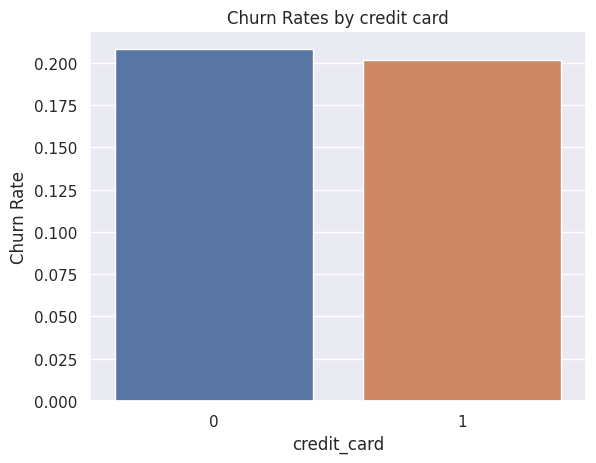

In [ ]:
credit_card_churn_rate = data.groupby('credit_card')['churn'].mean()
sns.barplot(x=credit_card_churn_rate.index, y=credit_card_churn_rate.values)
plt.xlabel('credit_card')
plt.ylabel('Churn Rate')
plt.title('Churn Rates by credit card')
plt.show()

Customers using credit cards account for (70.6%)
However, the churn rate for customers using credit cards and not using credit cards is the same (approximately 20%).

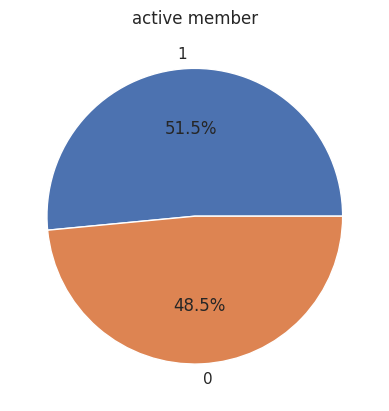

In [ ]:
active_member_counts = data['active_member'].value_counts()
plt.pie(active_member_counts, labels=active_member_counts.index, autopct='%1.1f%%')
plt.title("active member")
plt.show()

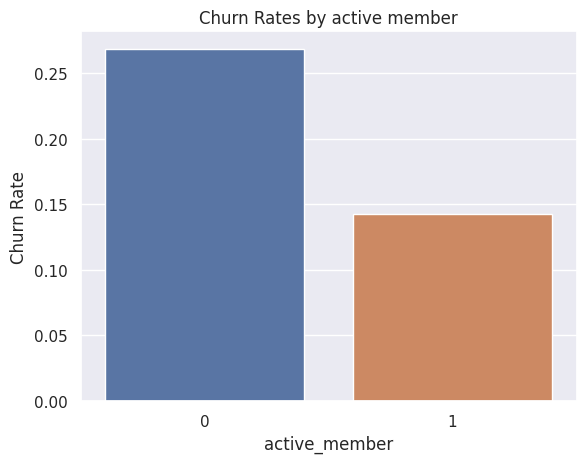

In [ ]:
active_member_churn_rate = data.groupby('active_member')['churn'].mean()
sns.barplot(x=active_member_churn_rate.index, y=active_member_churn_rate.values)
plt.xlabel('active_member')
plt.ylabel('Churn Rate')
plt.title('Churn Rates by active member')
plt.show()

Customers who actively use banking services and customers who do not use them regularly have similar numbers
Customers who do not regularly use banking services have a higher churn rate, but this is quite understandable.

Text(0.5, 1.0, 'Distribution of estimated salary')

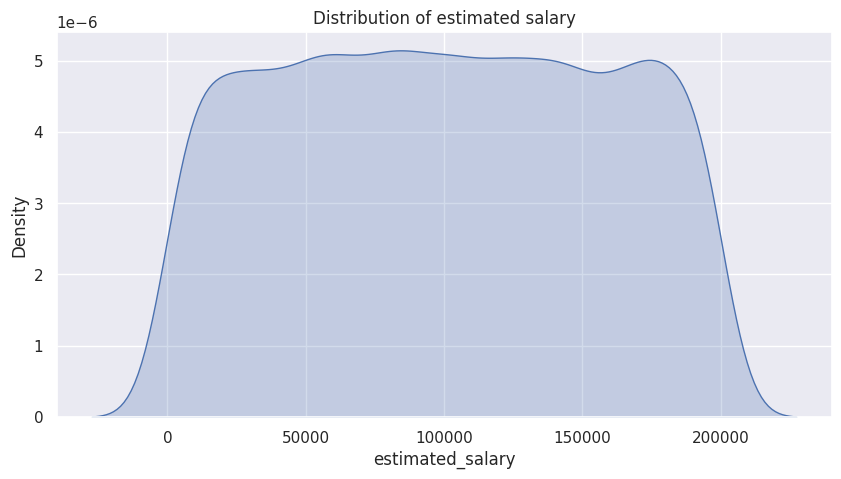

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data = data , x = data.estimated_salary , fill = True, common_norm=False )
plt.title('Distribution of estimated salary')

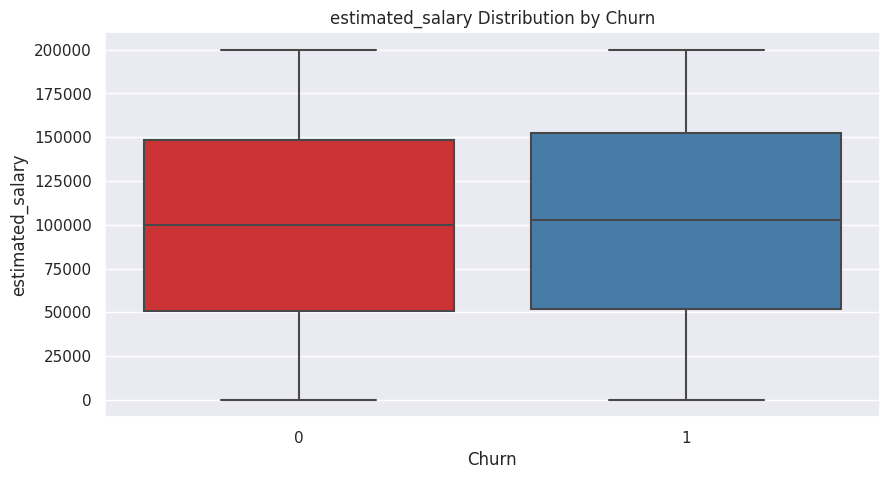

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='churn', y='estimated_salary', data=data, palette='Set1')
plt.xlabel('Churn')
plt.ylabel('estimated_salary')
plt.title('estimated_salary Distribution by Churn')
plt.show()

Text(0.5, 1.0, 'Distribution of credit score')

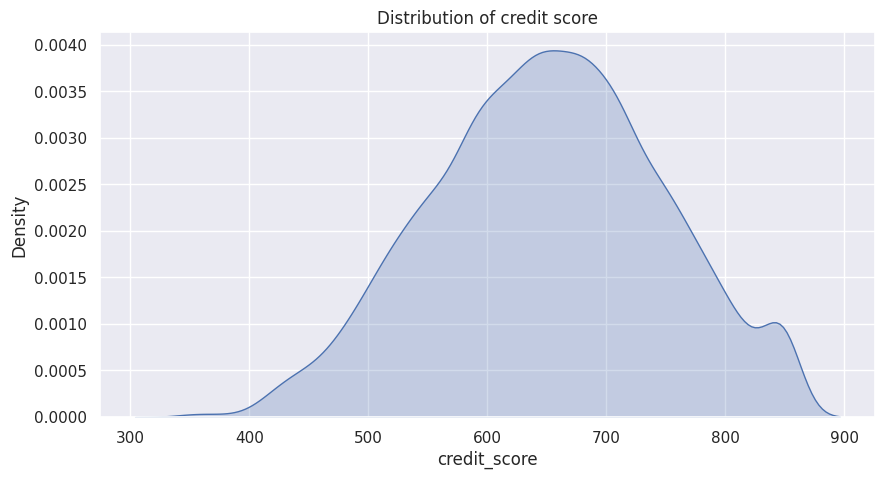

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data = data , x = data.credit_score , fill = True, common_norm=False )
plt.title('Distribution of credit score')

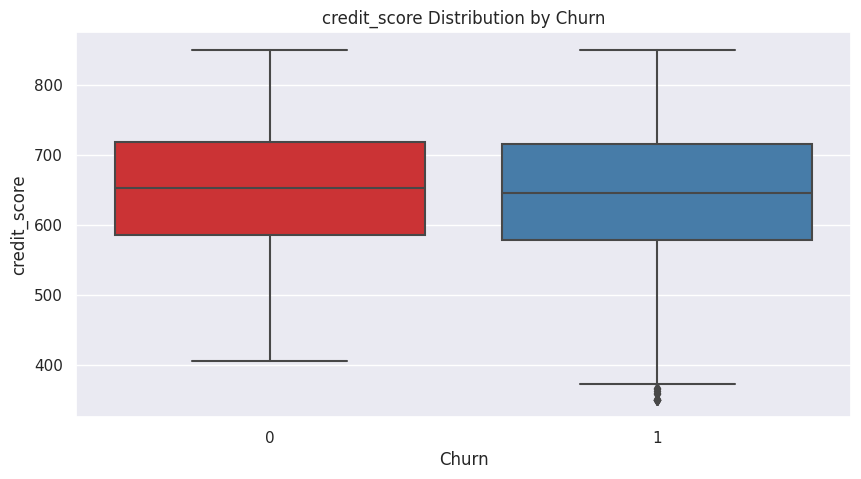

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='churn', y='credit_score', data=data, palette='Set1')
plt.xlabel('Churn')
plt.ylabel('credit_score')
plt.title('credit_score Distribution by Churn')
plt.show()

In [ ]:
data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,AgeGroup
0,619,0,0,24,2,0.00,1,1,1,101348.88,1,41-50
1,608,2,0,23,1,83807.86,1,0,1,112542.58,0,41-50
2,502,0,0,24,8,159660.80,3,1,0,113931.57,1,41-50
3,699,0,0,21,1,0.00,2,0,0,93826.63,0,31-40
4,850,2,0,25,2,125510.82,1,1,1,79084.10,0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,21,5,0.00,2,1,0,96270.64,0,31-40
9996,516,0,1,17,10,57369.61,1,1,1,101699.77,0,31-40
9997,709,0,0,18,7,0.00,1,0,1,42085.58,1,31-40
9998,772,1,1,24,3,75075.31,2,1,0,92888.52,1,41-50


In [ ]:
data = data.drop("AgeGroup",axis=1)

In [ ]:
data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,24,2,0.00,1,1,1,101348.88,1
1,608,2,0,23,1,83807.86,1,0,1,112542.58,0
2,502,0,0,24,8,159660.80,3,1,0,113931.57,1
3,699,0,0,21,1,0.00,2,0,0,93826.63,0
4,850,2,0,25,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,21,5,0.00,2,1,0,96270.64,0
9996,516,0,1,17,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,18,7,0.00,1,0,1,42085.58,1
9998,772,1,1,24,3,75075.31,2,1,0,92888.52,1


In [ ]:
data[["country","gender","churn"]] = data[["country","gender","churn"]].apply(LabelEncoder().fit_transform)

In [ ]:
x_train = data.drop("churn",axis=1)
y_train = data["churn"]
x_test = data.drop("churn",axis=1)
y_test = data["churn"]

In [ ]:
x_train.shape

(10000, 10)

In [ ]:
x_test.shape

(10000, 10)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logis_start_time = time.time()
logis = LogisticRegression()
logis.fit(x_train,y_train)
logis_end_time = time.time()
logis_training_time = logis_end_time - logis_start_time
y_pred = logis.predict(x_test)

In [ ]:
print(logis_training_time)

0.09409451484680176


In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.809


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7963
           1       0.60      0.18      0.28      2037

    accuracy                           0.81     10000
   macro avg       0.71      0.58      0.58     10000
weighted avg       0.78      0.81      0.77     10000



Text(0.5, 19.049999999999997, 'Du bao')

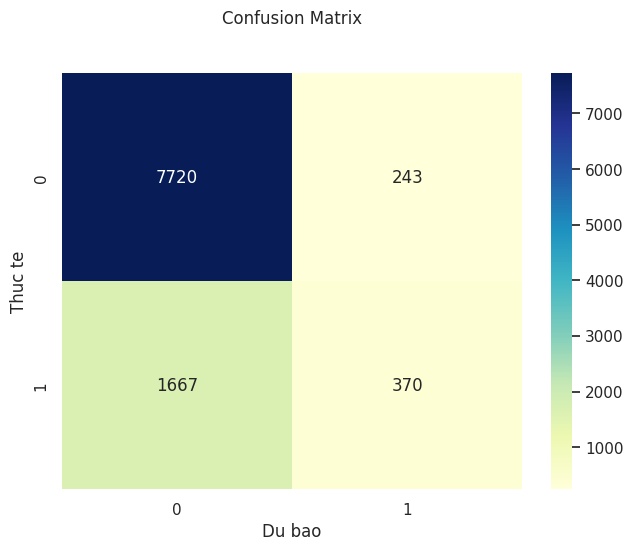

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred)
class_name = [0,1]
tick_mark = np.arange(len(class_name))
fig, ax = plt.subplots()
plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Thuc te")
plt.xlabel("Du bao")

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB_start_time = time.time()
GNB = GaussianNB()
GNB.fit(x_train,y_train)
GNB_end_time = time.time()
GNB_training_time = GNB_end_time - GNB_start_time
y_pred1 = GNB.predict(x_test)

In [ ]:
print(GNB_training_time)

0.005362987518310547


In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred1))

Accuracy:  0.8293


In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      7963
           1       0.75      0.24      0.37      2037

    accuracy                           0.83     10000
   macro avg       0.79      0.61      0.63     10000
weighted avg       0.82      0.83      0.79     10000



Text(0.5, 19.049999999999997, 'Du bao')

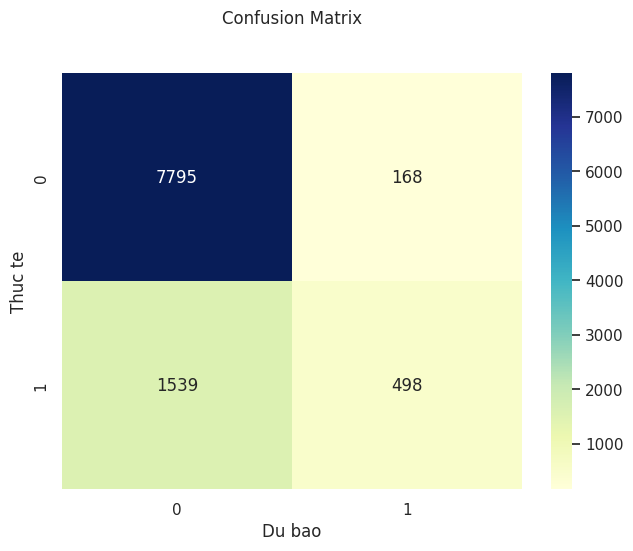

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred1)
class_name = [0,1]
tick_mark = np.arange(len(class_name))
fig, ax = plt.subplots()
plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Thuc te")
plt.xlabel("Du bao")

In [ ]:
from sklearn import tree
DT_start_time = time.time()
DT = tree.DecisionTreeClassifier()
DT.fit(x_train,y_train)
DT_end_time = time.time()
DT_training_time = DT_end_time - DT_start_time
y_pred2 = DT.predict(x_test)

In [ ]:
print(DT_training_time)

0.11385297775268555


In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred2))

Accuracy:  1.0


In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7963
           1       1.00      1.00      1.00      2037

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



Text(0.5, 19.049999999999997, 'Du bao')

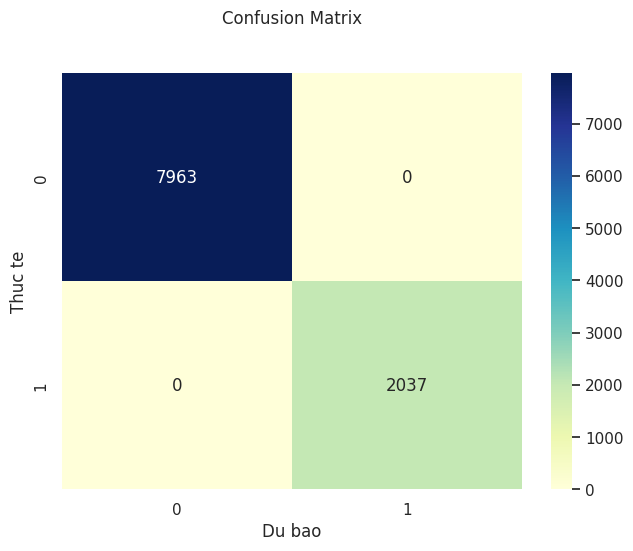

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred2)
class_name = [0,1]
tick_mark = np.arange(len(class_name))
fig, ax = plt.subplots()
plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Thuc te")
plt.xlabel("Du bao")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_start_time = time.time()
RF = RandomForestClassifier(n_estimators=10)
RF.fit(x_train,y_train)
RF_end_time = time.time()
RF_training_time = RF_end_time - RF_start_time
y_pred3 = RF.predict(x_test)

In [ ]:
print(RF_training_time)

0.24330377578735352


In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred3))

Accuracy:  0.9835


In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7963
           1       1.00      0.92      0.96      2037

    accuracy                           0.98     10000
   macro avg       0.99      0.96      0.97     10000
weighted avg       0.98      0.98      0.98     10000



Text(0.5, 19.049999999999997, 'Du bao')

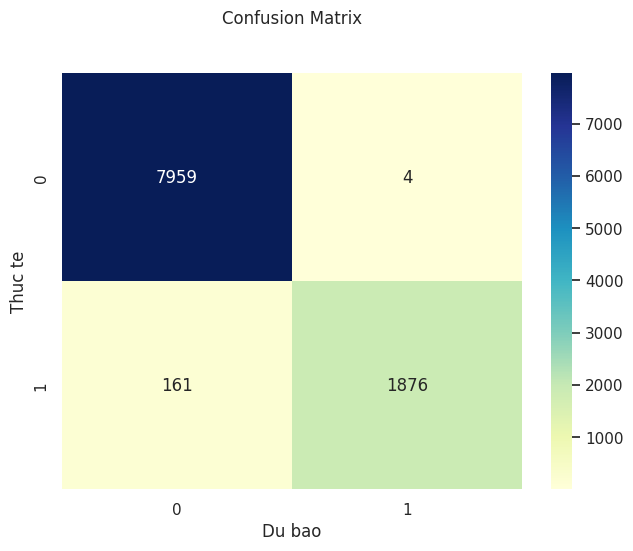

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred3)
class_name = [0,1]
tick_mark = np.arange(len(class_name))
fig, ax = plt.subplots()
plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Thuc te")
plt.xlabel("Du bao")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_start_time = time.time()
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)
KNN_end_time = time.time()
KNN_training_time = KNN_end_time - KNN_start_time
y_pred4 = KNN.predict(x_test)

In [ ]:
print(KNN_training_time)

0.13367319107055664


In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred4))

Accuracy:  0.879


In [ ]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      7963
           1       0.81      0.53      0.64      2037

    accuracy                           0.88     10000
   macro avg       0.85      0.75      0.78     10000
weighted avg       0.87      0.88      0.87     10000



Text(0.5, 19.049999999999997, 'Du bao')

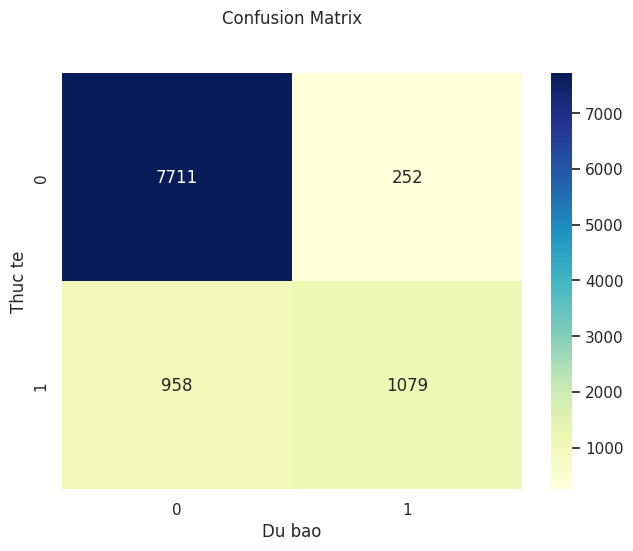

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred4)
class_name = [0,1]
tick_mark = np.arange(len(class_name))
fig, ax = plt.subplots()
plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Thuc te")
plt.xlabel("Du bao")

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
bag_start_time = time.time()
bag = BaggingClassifier(LogisticRegression(),random_state=20)
bag.fit(x_train,y_train)
bag_end_time = time.time()
bag_training_time = bag_end_time - bag_start_time
y_pred5 = bag.predict(x_test)

In [ ]:
print(bag_training_time)

0.2771775722503662


In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred5))

Accuracy:  0.8085


In [ ]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7963
           1       0.60      0.19      0.28      2037

    accuracy                           0.81     10000
   macro avg       0.71      0.58      0.59     10000
weighted avg       0.78      0.81      0.77     10000



Text(0.5, 19.049999999999997, 'Du bao')

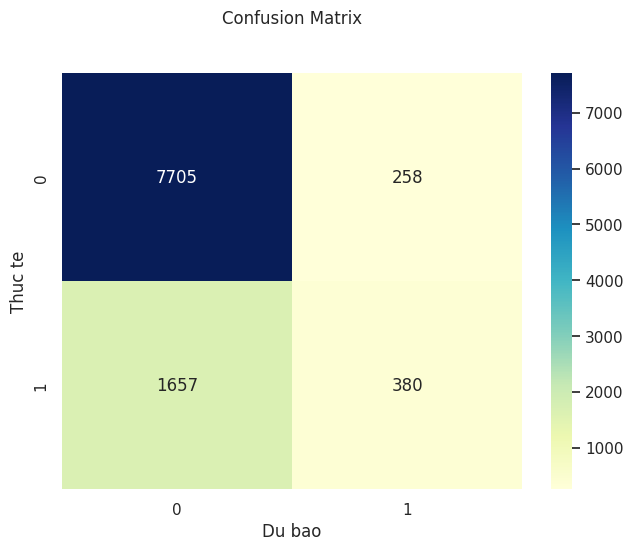

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred5)
class_name = [0,1]
tick_mark = np.arange(len(class_name))
fig, ax = plt.subplots()
plt.xticks(tick_mark,class_name)
plt.yticks(tick_mark,class_name)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Thuc te")
plt.xlabel("Du bao")